<a href="https://colab.research.google.com/github/HRKagdi/Machine-Learning/blob/master/BackPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
print(data.target.shape)

(150,)


In [0]:
X=data.data
Y=data.target

In [0]:
#Code for randomly shuffling the dataset
from scipy.sparse import coo_matrix
X_sparse = coo_matrix(X)
from sklearn.utils import shuffle
X, X_sparse, y = shuffle(X, X_sparse, Y, random_state=0)
X=X_sparse.toarray()
Y=y

In [6]:
print(X.shape)

(150, 4)


In [0]:
Y=Y.reshape(150,1)

In [0]:
#Divivding the dataset into training and testing 
train_X=X[0:125,:]
train_Y=Y[0:125,:]
test_X=X[125:,:]
test_Y=Y[125:,:]

In [0]:
def sigmoid(x):
  for i in range(0,x.shape[0]):
    x[i]=1/(1+np.exp(-1*x[i]))
  return x

In [0]:
def diffSigmoid(x):
  for i in  range(0,len(x)):
    y=1/(1+np.exp(-1*x[i]))
    x[i]=y*(1-y)
  return x 

In [12]:
print(Y.shape)

(150, 1)


In [0]:
#Random initialization of Weights Matrices
#Model contains 4 layers having 4->8->8->3 neurons respectively
w12=np.random.rand(8,4)
b1=np.random.rand(8,1)
w23=np.random.rand(8,8)
b2=np.random.rand(8,1)
w34=np.random.rand(3,8)
b3=np.random.rand(3,1)

In [14]:
print(w23)

[[0.16616811 0.79923688 0.70950016 0.41713829 0.0081651  0.49690902
  0.71149381 0.63326834]
 [0.37841623 0.45339505 0.56816988 0.343976   0.95945031 0.80794165
  0.69200573 0.70361616]
 [0.96182631 0.75813215 0.50032362 0.41863587 0.59899627 0.37063796
  0.15210811 0.14780756]
 [0.88256236 0.50267553 0.09603736 0.34523228 0.38444744 0.84118221
  0.71679475 0.89115896]
 [0.19435115 0.7647265  0.64042732 0.99323795 0.79989344 0.42251823
  0.63603514 0.31668484]
 [0.38889171 0.62436805 0.35862808 0.43577152 0.9735671  0.49126394
  0.51570957 0.61623999]
 [0.66365588 0.29794498 0.38515913 0.61933966 0.8127476  0.52356607
  0.08148172 0.95495946]
 [0.25507315 0.6749317  0.79947909 0.06002974 0.73270969 0.81841176
  0.58885822 0.29375379]]


In [0]:
def forwardPropagation(X,Y,dict2):
    dict ={}
    w12=dict2["w12"]
    w23=dict2["w23"]
    w34=dict2["w34"]
    b1=dict2["b1"]
    b2=dict2["b2"]
    b3=dict2["b3"]
    X=np.asarray(X)
    X=X.reshape((4,1))
    net1=np.dot(w12,X)+b1
    a1=sigmoid(net1)
    net2=np.dot(w23,a1)+b2
    a2=sigmoid(net2)
    net3=np.dot(w34,a2)+b3
    a3=sigmoid(net3)
    error=1/2*np.sum(pow((Y-a3),2))
    dict["a1"]=a1
    dict["a2"]=a2
    dict["a3"]=a3
    dict["net1"]=net1
    dict["net2"]=net2
    dict["net3"]=net3
    dict["err"]=error
    return dict

In [0]:
def Backpropagation(X,y,alpha,dict,dict2):
  a1=dict["a1"]
  a2=dict["a2"]
  a3=dict["a3"]
  net1=dict["net1"]
  net2=dict["net2"]
  net3=dict["net3"]
  error=dict["err"]
  w12=dict2["w12"]
  w23=dict2["w23"]
  w34=dict2["w34"]
  b1=dict2["b1"]
  b2=dict2["b2"]
  b3=dict2["b3"]
  y1=np.zeros((3,1))
  y1[y]=1
  a3=a3.reshape((3,1))
  a2=a2.reshape((8,1))
  a1=a1.reshape((8,1))
  X=np.asarray(X)
  X=X.reshape((4,1))
  temp=np.multiply(a3-y1,np.multiply(a3,np.ones(a3.shape)-a3))
  temp2=np.multiply(np.dot(temp.transpose(),w34).T,np.multiply(a2,np.ones(a2.shape)-a2))
  temp3=np.multiply(np.dot(temp2.transpose(),w23).T,np.multiply(a1,np.ones(a1.shape)-a1))
  w34=w34-(alpha)*(np.dot(temp,a2.T))
  b3=b3-(alpha)*temp 
  w23=w23-(alpha)*(np.dot(temp2,a1.T))
  b2=b2-(alpha)*temp2
  w12=w12-(alpha)*(np.dot(temp3,X.T))            
  b1=b1-(alpha)*(temp3)
  dict2["w12"]=w12
  dict2["w23"]=w23 
  dict2["w34"]=w34
  dict2["b1"]=b1
  dict2["b2"]=b2
  dict2["b3"]=b3
  return dict2

In [0]:
def main(X,y):
  max_iter=8000
  alpha=0.01
  weights={}
  cost_list=[]
  weights["w12"]=w12
  weights["w23"]=w23 
  weights["w34"]=w34
  weights["b1"]=b1
  weights["b2"]=b2
  weights["b3"]=b3
  weights['No_of_Iter']=max_iter
  while(True):
    for i in range(1,X.shape[0]):
      d1=forwardPropagation(X[i],y[i],weights)
      weights=Backpropagation(X[i],y[i],alpha,d1,weights)
      curr_error=d1["err"]
    max_iter=max_iter-1
    if(max_iter<0):
      break
    final=d1["err"]
    cost_list.append(final)
  weights['cost']=cost_list
  return weights

In [24]:
ans=main(train_X,train_Y)
u=ans["w23"]
print(u)

[[ 0.32006121  0.92897981  0.75112722  0.17751267  0.15762444  0.65089991
   0.85958315  0.77931255]
 [ 0.41229883  0.48240471  0.55742791  0.21107468  0.99334822  0.84185918
   0.72474932  0.73547902]
 [-0.05216973 -0.15833399 -1.45821935  6.00256884 -0.39744372 -0.64438502
  -0.84024771 -0.81501873]
 [ 0.95334969  0.55939807  0.08006493  0.21467161  0.45197769  0.91201513
   0.78439369  0.95771882]
 [ 0.28102712  0.84796732  0.64054587  0.98543046  0.88513423  0.5092052
   0.72197716  0.40201224]
 [ 0.4327268   0.66721284  0.2941235   0.42499433  1.01575054  0.53509511
   0.55941844  0.65950632]
 [-1.17194537 -1.34575722  6.90462162  5.00217488 -0.9271402  -1.31258568
  -1.71927008 -0.79679151]
 [-0.05529439  0.35421422  3.40301915 -3.35154591  0.43356685  0.50854351
   0.2759069  -0.02632051]]


In [25]:
#Prediction
from sklearn.metrics import mean_squared_error
pred=forwardPropagation(test_X[19],test_Y[19],ans);
print(pred["a3"])
print(test_Y[19])

[[0.97274675]
 [0.01821865]
 [0.00365014]]
[0]


In [26]:
test_X.shape

(25, 4)

<function matplotlib.pyplot.show>

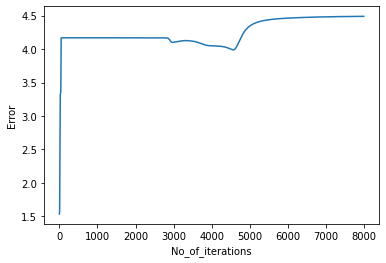

In [27]:
i=ans['No_of_Iter']
iter=np.arange(0,i)
error=ans['cost']
plt.plot(iter,error)
plt.xlabel('No_of_iterations')
plt.ylabel('Error')
plt.show